In [61]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition
from sklearn import datasets

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

noise = .2

noise2 = .5


Data set 1: dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())

Pretty much none of the classifiers worked particularly well with this dataset. Since it is completely random, there isn't much of a pattern to pick up. The best was the DecisionTreeClassifier(). The classifiers that rely on rely on separating the dataset on an axis, or by proximity simply did not work in this case. As a result, the decision tree came out on top.

Data set 2: dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit())

All of the models performed well on this simple data set. The data were very easily distinguishable. The Decision tree and the Ensemble Gradient Booster came out on top, but only very marginally. Classifiers that classified based on neighboring classes worked well, as did those that attempted to divide the dataset along an axis.

Dataset 3: dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))

Adding some noise to the dataset decreased the accuracy of some of the classifiers. The K Nearest Neighbors AUC decreased significantly, for example, once the nearest datapoints got muddled together. The Best performers were the Naive Bayes, the SVMs, the nueral network, and the logistic regression. Again, this was a pretty simple dataset, with minor overlap. The classifiers that were not reliant on proximity to other datapoints worked well.

Dataset 4: dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise2))

This time I introduced even more noise, to see if the the classifiers would continue to hold up. The accuracy dropped significanlty across the board, but the Random Forest and the Nueral Network MLP classifiers came out on top. Because the random forest aggregates a lot of decision trees, and tries to balance out variance, the increased noise of this dataset does not affect it as much as the other classifiers. The Nueral Network MLP classifier is better capable of learning non linear models, which this is, with all of the noise introduced.

Dataset 5: dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit())

For this dataset, which essentailly separates the data into oppisite corners, the classifiers that attempted to separate the data cleanly along one axis failed. Instead, the K Nearest Neighbors, Decision Tree, Random Forest, Nueral Network MLP, and ensemble.GradientBoostingClassifier worked best. K Nearest worked best because the data was grouped together and separated from unlike data. Once again, we see that the classifiers that work best with non linear data perform better.

Dataset 6: dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise))

By introducing some noise into the dataset, we again see that some classifiers perform worse. Both the K Nearest Neighbors and Random Forest performs worse, while the Nueral Network MLP classifier, with its ability to learn non linear models emerges on top.

Dataset 7: dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit())

So this dataset nests one category within another. For this clean version, many classifiers performed well. Notably the SVM and logistic regression performed poorly, which was unspurising. This data is quite hard to seperate neatly. 

Dataset 8: dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))

Introducing some noise again, and once again the Nueral Network MLP classifier performed best. There seems to be a pattern emerging, where non linear datasets are best modelled by the MLP.

Dataset 9: dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

For this dataset, all of the classifiers performed well. The majority of the categories were clearly grouped together, and separated, the only noise existed on the boundary of two of them. And this is the area where the classifiers struggled. The Random Forest classifier and the K Nearest Neighbors emerged as the strongest. The K Nearest because there just wasn't enough noise to throw it off and the Random Forest because it was able, like in previous datasets, to reduce variance by combining multiple decision trees. 

Dataset 10: dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise2))

Increasing the noise greatly decreased the accuracy of the K Nearest Neighbors classifiers. Suprisingly, a lot of the other classifiers seemed to do well. What was happening was they were easily classifiying the categories that were not intermingled with any others, and had difficulty classifying the noisy data. 

Empirical Datasets:

Reddit:

A lot of classifiers seemed to do well with this one. Only the Naive Bayes and svm.SVC(kernel = 'poly' did poorly. There seems to be a lot over overlap between different categories, but perhaps there is enough distinction at the smaller scales, that the decision trees are able to figure things out. The Random Forest classifier, which is capable of using this overfitting to achieve better results, performed better than the simple decision tree.

News groups:

SVM SVC with a linear kernel performed best in this case, alongside Nueral Network MLP classifier. This is a bit suprising. However, it seems that there was enough distinction between the news groups to be able to seperate them linearly, and enough spread for the MLP classifier to work as well.

Senate Small:

SVM SVC with a linear kernel performed best in this case as well. Looking at the data it seems that though there is a small overlap between the Obama and Clinton data, most of it can be accurately divided along a linear axis.

Senate Large:

Many of the classifiers did well with this one. It seems that sharing the first letter of your last name does not guarantee similarity in political views or speeches. Looking at the data there does seem to be a lot of overlap, but the decision tree and random forest classifiers were able to classify the data with a high degree of accuracy, likely becuase they were finding those minute differences.

Spam:

Suprisingly a lot of the classifiers struggled to clasify spam vs ham. The best turned out to be the Naive Bayes and the Neural Network MLP classifiers. This is not too suprising. The Naive Bayes outright states that it is good at classifying spam, and the NN MLP works well with non linear data, which this seems to be.


In [222]:
# new classifier
clf = sklearn.ensemble.BaggingClassifier()

In [223]:
noise = .2
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))

In [224]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [225]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.105,0.894726,0.906542,0.869209,0.898148
1,0.105,0.894726,0.881720,0.835881,0.891304


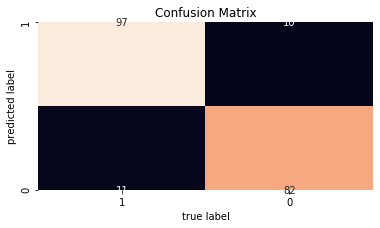

In [226]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

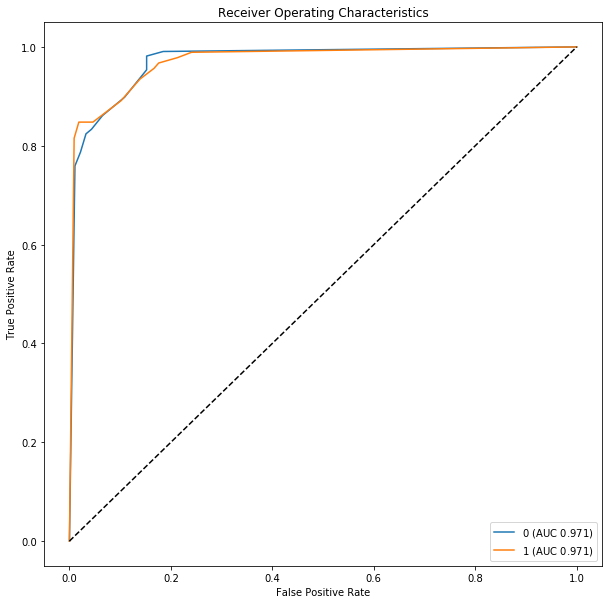

In [227]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


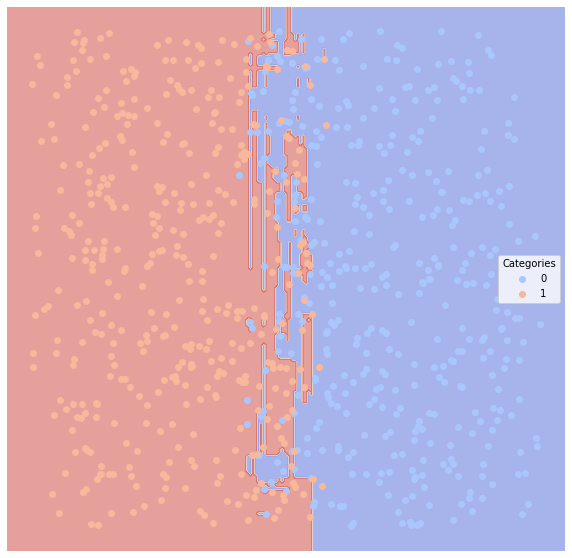

In [228]:
lucem_illud_2020.plotregions(clf, dfTrain)

In [229]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())

Loading senator: Klobuchar
Loading senator: Kyl
Loading senator: Kerry
Loading senator: Kohl
Loading senator: Kennedy
Converting to vectors


In [230]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [231]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Kerry,0.000000,1.000000,1.000000,1.000000,1.000000
Kyl,0.001282,0.995763,1.000000,0.992807,0.991525
Kohl,0.001282,0.999291,0.986842,0.986842,1.000000
Klobuchar,0.001282,0.991379,1.000000,0.984041,0.982759
Kennedy,0.003846,0.996263,0.993902,0.992145,0.996942


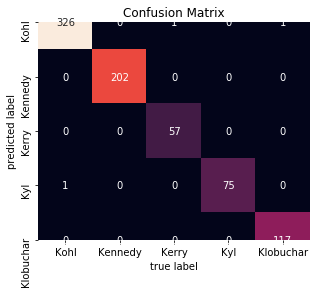

In [232]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

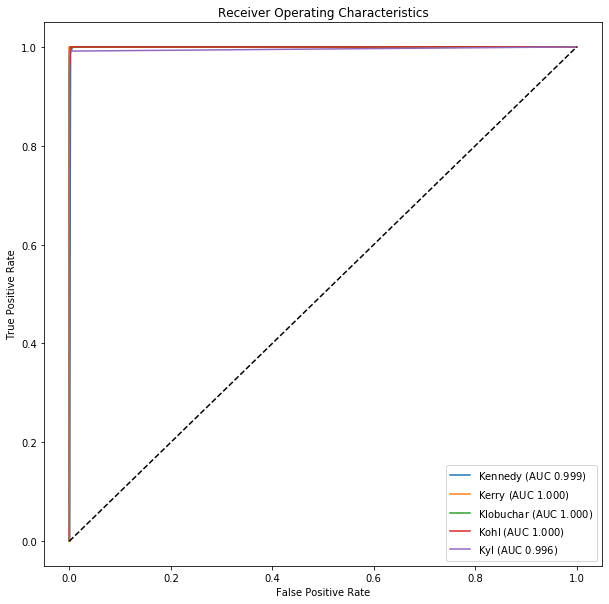

In [233]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

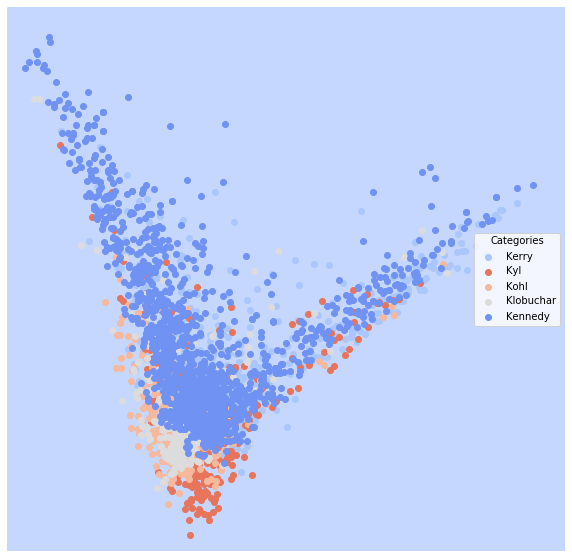

In [234]:
lucem_illud_2020.plotregions(clf, dfTrain)

A bagging classifier essentailly aggregates the predictions of a lot of other classifiers to make a better final prediction. It runs base classifiers on subsets of the data and then takes all of their predictions and that is its final prediction. It can be used to reduce the variance of some black box models, such as the decision trees we used. In both cases, it seemed to perform on par with the best classifiers for each dataset.

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. 
    
<span style="color:red">How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


In [40]:
targetDir = '/Users/Leha/Desktop/Izvestia/Abby_Fine_Reader_Extracted_Text/1997_txt' #Change this to your own directory of texts
izvestiiaText = []
izvestiiaFileName = []
IzvestiiaYear = []
Izvestiiatype = []
t = "Democratic"
year = "1997"


for file in (file for file in os.scandir(targetDir) if file.is_file() and not file.name.startswith('.')):
    with open(file.path, encoding="utf-8") as f:
        izvestiiaText.append(f.read())
    izvestiiaFileName.append(file.name)
    IzvestiiaYear.append(year)
    Izvestiiatype.append(t)

In [41]:
izvestiia_df1997 = pandas.DataFrame({'text' : izvestiiaText, 'year':IzvestiiaYear, 'filename':izvestiiaFileName, 'type':Izvestiiatype})
izvestiia_df1997

,text,year,filename,type
0,﻿ФИНАНСОВЫЕ ИЗВЕСТИЯ Ко 99 <459)\nБАНКИ И ФИНА...,1997,1997 Issue 246 December 30 Page 9.txt,Democratic
1,﻿№ 75 О\nИЗВЕСТИЯ\n22 апреля 1997 года •\n3\nП...,1997,1997 Issue 75 April 22 Page 3.txt,Democratic
2,﻿№ 94 •\nИЗВЕСТИЯ\nБОЛЬШИЕ\nОЗМОЖНОСТИ\nРОСТА\...,1997,1997 Issue 94 May 22 Page 6.txt,Democratic
3,﻿№ 133 •\nИЗВЕСТИЯ\n18 июля 1997 года *\nВерса...,1997,1997 Issue 133 July 18 Page 3.txt,Democratic
4,﻿1\nI\nI\nС0-7МЮ5 ®\n•\tПроигрыватель СО для 2...,1997,1997 Issue 37 February 26 Page 4.txt,Democratic
...,...,...,...,...
110,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic
111,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic
112,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic
113,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic


In [42]:
targetDir = '/Users/Leha/Desktop/Izvestia/Abby_Fine_Reader_Extracted_Text/1996_txt' #Change this to your own directory of texts
izvestiiaText = []
izvestiiaFileName = []
IzvestiiaYear = []
year = "1996"
Izvestiiatype = []
t = "Democratic"

for file in (file for file in os.scandir(targetDir) if file.is_file() and not file.name.startswith('.')):
    with open(file.path, encoding="utf-8") as f:
        izvestiiaText.append(f.read())
    izvestiiaFileName.append(file.name)
    IzvestiiaYear.append(year)
    Izvestiiatype.append(t)

In [43]:
izvestiia_df1996 = pandas.DataFrame({'text' : izvestiiaText, 'year':IzvestiiaYear, 'filename':izvestiiaFileName, 'type':Izvestiiatype})

In [44]:
targetDir = '/Users/Leha/Desktop/Izvestia/Abby_Fine_Reader_Extracted_Text/1995_txt' #Change this to your own directory of texts
izvestiiaText = []
izvestiiaFileName = []
IzvestiiaYear = []
year = "1995"
Izvestiiatype = []
t = "Democratic"

for file in (file for file in os.scandir(targetDir) if file.is_file() and not file.name.startswith('.')):
    with open(file.path, encoding="utf-8") as f:
        izvestiiaText.append(f.read())
    izvestiiaFileName.append(file.name)
    IzvestiiaYear.append(year)
    Izvestiiatype.append(t)

In [45]:
izvestiia_df1995 = pandas.DataFrame({'text' : izvestiiaText, 'year':IzvestiiaYear, 'filename':izvestiiaFileName, 'type':Izvestiiatype})

In [46]:
targetDir = '/Users/Leha/Content-Analysis-2020/data/1984_txt' #Change this to your own directory of texts
izvestiiaText = []
izvestiiaFileName = []
IzvestiiaYear = []
year = "1984"
Izvestiiatype = []
t = "Communist"

for file in (file for file in os.scandir(targetDir) if file.is_file() and not file.name.startswith('.')):
    with open(file.path, encoding="utf-8") as f:
        izvestiiaText.append(f.read())
    izvestiiaFileName.append(file.name)
    IzvestiiaYear.append(year)
    Izvestiiatype.append(t)

In [47]:
izvestiia_df1984 = pandas.DataFrame({'text' : izvestiiaText, 'year':IzvestiiaYear, 'filename':izvestiiaFileName, 'type':Izvestiiatype})

In [48]:
targetDir = '/Users/Leha/Content-Analysis-2020/data/1985_txt' #Change this to your own directory of texts
izvestiiaText = []
izvestiiaFileName = []
IzvestiiaYear = []
year = "1985"
Izvestiiatype = []
t = "Communist"

for file in (file for file in os.scandir(targetDir) if file.is_file() and not file.name.startswith('.')):
    with open(file.path, encoding="utf-8") as f:
        izvestiiaText.append(f.read())
    izvestiiaFileName.append(file.name)
    IzvestiiaYear.append(year)
    Izvestiiatype.append(t)

In [49]:
izvestiia_df1985 = pandas.DataFrame({'text' : izvestiiaText, 'year':IzvestiiaYear, 'filename':izvestiiaFileName, 'type':Izvestiiatype})

In [50]:
targetDir = '/Users/Leha/Content-Analysis-2020/data/1986_txt' #Change this to your own directory of texts
izvestiiaText = []
izvestiiaFileName = []
IzvestiiaYear = []
year = "1986"
Izvestiiatype = []
t = "Communist"

for file in (file for file in os.scandir(targetDir) if file.is_file() and not file.name.startswith('.')):
    with open(file.path, encoding="utf-8") as f:
        izvestiiaText.append(f.read())
    izvestiiaFileName.append(file.name)
    IzvestiiaYear.append(year)
    Izvestiiatype.append(t)

In [51]:
izvestiia_df1986 = pandas.DataFrame({'text' : izvestiiaText, 'year':IzvestiiaYear, 'filename':izvestiiaFileName, 'type':Izvestiiatype})

In [52]:
izvestiia_df1986

,text,year,filename,type
0,ПРОЛЕТАРИИ ВСЕХ СТРАН. С О1ДИНЯЙТЕСБ! ПРОЛЕТАМ...,1986,1986 Issue 080 Page 1.txt,Communist
1,ИЗВЕСТИЯ\t■■\t\t\n\n\t\t№ 360\t♦\t26 декабря\n...,1986,1986 Issue 360 Page 6.txt,Communist
2,ИЗВЕСТИЯ\n\nНА БУЕРАХ — ЗА ПОЛЯРНЫМ КРУГОМ\n\n...,1986,1986 Issue 136 Page 6.txt,Communist
3,ИЗВЕСТИЯ\n\nПО СТРАНАМ 1/1 НСНТИНЕНТАМ = -\n\n...,1986,1986 Issue 136 Page 4.txt,Communist
4,№80\t♦\t21 марта 1986 года\n\nУказ Президиума\...,1986,1986 Issue 080 Page 2.txt,Communist
...,...,...,...,...
73,№ 192\t♦\t11 июля 1986 года ♦\t^5\n\nИГРЫ добр...,1986,1986 Issue 192 Page 6.txt,Communist
74,№ 248\t♦\t5 сентября 1986 года ♦\n\nПО СЛЕДАМ ...,1986,1986 Issue 248 Page 2.txt,Communist
75,СООБЩЕНИЯ ИЗ-ЗА РУБЕЖА\n\nЦЕНТРАЛЬНАЯ АМЕРИКА ...,1986,1986 Issue 024 Page 1.txt,Communist
76,№ 248 ♦\t5 сентября 1986 года ♦\t3\n\nПРИГЛАША...,1986,1986 Issue 248 Page 3.txt,Communist


In [57]:
df = pd.concat([izvestiia_df1984, izvestiia_df1985, izvestiia_df1986, izvestiia_df1995, izvestiia_df1996, izvestiia_df1997])
df

,text,year,filename,type
0,ИЗВЕСТИЯ\n\nПСЭ СТРАНАМ И НОНТИНЕНТАМ\n\n\t• б...,1984,1984 Issue 278 Page 4.txt,Communist
1,• 1 ноября 1984 года О 2\n\nний период. Смонти...,1984,1984 Issue 306 Page 2.txt,Communist
2,•\t1 ноября 1984 года О «3\n\n\n\nК 40-летмю в...,1984,1984 Issue 306 Page 3.txt,Communist
3,ИЗВЕСТИЯ\n\nПО СТРАНАМ И КСНТИНЕНТАМ\n\n\t•\t5...,1984,1984 Issue 278 Page 5.txt,Communist
4,•\t29 ноября 1984 года •\t6\n\nновости\n\nоон\...,1984,1984 Issue 334 Page 6.txt,Communist
...,...,...,...,...
110,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic
111,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic
112,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic
113,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic


In [58]:
df.reset_index(inplace=True)
df

,index,text,year,filename,type
0,0,ИЗВЕСТИЯ\n\nПСЭ СТРАНАМ И НОНТИНЕНТАМ\n\n\t• б...,1984,1984 Issue 278 Page 4.txt,Communist
1,1,• 1 ноября 1984 года О 2\n\nний период. Смонти...,1984,1984 Issue 306 Page 2.txt,Communist
2,2,•\t1 ноября 1984 года О «3\n\n\n\nК 40-летмю в...,1984,1984 Issue 306 Page 3.txt,Communist
3,3,ИЗВЕСТИЯ\n\nПО СТРАНАМ И КСНТИНЕНТАМ\n\n\t•\t5...,1984,1984 Issue 278 Page 5.txt,Communist
4,4,•\t29 ноября 1984 года •\t6\n\nновости\n\nоон\...,1984,1984 Issue 334 Page 6.txt,Communist
...,...,...,...,...,...
652,110,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic
653,111,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic
654,112,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic
655,113,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic


In [59]:
df = df.drop("index", axis = 1)
df

,text,year,filename,type
0,ИЗВЕСТИЯ\n\nПСЭ СТРАНАМ И НОНТИНЕНТАМ\n\n\t• б...,1984,1984 Issue 278 Page 4.txt,Communist
1,• 1 ноября 1984 года О 2\n\nний период. Смонти...,1984,1984 Issue 306 Page 2.txt,Communist
2,•\t1 ноября 1984 года О «3\n\n\n\nК 40-летмю в...,1984,1984 Issue 306 Page 3.txt,Communist
3,ИЗВЕСТИЯ\n\nПО СТРАНАМ И КСНТИНЕНТАМ\n\n\t•\t5...,1984,1984 Issue 278 Page 5.txt,Communist
4,•\t29 ноября 1984 года •\t6\n\nновости\n\nоон\...,1984,1984 Issue 334 Page 6.txt,Communist
...,...,...,...,...
652,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic
653,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic
654,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic
655,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic


In [60]:
export_json = df.to_json('izvestiia_type.json')

In [62]:
df['category'] = [s == 'Communist' for s in df['type']]
df

,text,year,filename,type,category
0,ИЗВЕСТИЯ\n\nПСЭ СТРАНАМ И НОНТИНЕНТАМ\n\n\t• б...,1984,1984 Issue 278 Page 4.txt,Communist,True
1,• 1 ноября 1984 года О 2\n\nний период. Смонти...,1984,1984 Issue 306 Page 2.txt,Communist,True
2,•\t1 ноября 1984 года О «3\n\n\n\nК 40-летмю в...,1984,1984 Issue 306 Page 3.txt,Communist,True
3,ИЗВЕСТИЯ\n\nПО СТРАНАМ И КСНТИНЕНТАМ\n\n\t•\t5...,1984,1984 Issue 278 Page 5.txt,Communist,True
4,•\t29 ноября 1984 года •\t6\n\nновости\n\nоон\...,1984,1984 Issue 334 Page 6.txt,Communist,True
...,...,...,...,...,...
652,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic,False
653,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic,False
654,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic,False
655,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic,False


In [63]:
import stanfordnlp
from spacy_stanfordnlp import StanfordNLPLanguage
import spacy

In [68]:
snlp = stanfordnlp.Pipeline(lang="ru", processors='tokenize,lemma') 
nlp = StanfordNLPLanguage(snlp)

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/Users/Leha/stanfordnlp_resources/ru_syntagrus_models/ru_syntagrus_tokenizer.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/Users/Leha/stanfordnlp_resources/ru_syntagrus_models/ru_syntagrus_lemmatizer.pt', 'lang': 'ru', 'shorthand': 'ru_syntagrus', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
Done loading processors!
---


In [93]:
def text_cleaner(text):
    return re.sub('[^а-яА-Я\s]', '', text)

In [94]:
df['clean_text'] = df['text'].apply(lambda x: text_cleaner(x))

In [95]:
df

,text,year,filename,type,category,clean_text
0,ИЗВЕСТИЯ\n\nПСЭ СТРАНАМ И НОНТИНЕНТАМ\n\n\t• б...,1984,1984 Issue 278 Page 4.txt,Communist,True,ИЗВЕСТИЯ\n\nПСЭ СТРАНАМ И НОНТИНЕНТАМ\n\n\t б ...
1,• 1 ноября 1984 года О 2\n\nний период. Смонти...,1984,1984 Issue 306 Page 2.txt,Communist,True,ноября года О \n\nний период Смонтированы у...
2,•\t1 ноября 1984 года О «3\n\n\n\nК 40-летмю в...,1984,1984 Issue 306 Page 3.txt,Communist,True,\t ноября года О \n\n\n\nК летмю восстаиомеш ...
3,ИЗВЕСТИЯ\n\nПО СТРАНАМ И КСНТИНЕНТАМ\n\n\t•\t5...,1984,1984 Issue 278 Page 5.txt,Communist,True,ИЗВЕСТИЯ\n\nПО СТРАНАМ И КСНТИНЕНТАМ\n\n\t\t о...
4,•\t29 ноября 1984 года •\t6\n\nновости\n\nоон\...,1984,1984 Issue 334 Page 6.txt,Communist,True,\t ноября года \t\n\nновости\n\nоон\n\n по СТ...
...,...,...,...,...,...,...
652,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\n марта \t\nНаш рейтинг\n \n Дач...
653,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\n января года \nВ соответствии с...
654,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic,False,\nИЗВЕСТИЯ\n марта года \n Таблетки\nБромел...
655,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic,False,\nИЗВЕСТИЯ\n ноября года \n\n Так считает п...


In [100]:
def text_cleaner2(text):
    clean_text = text.replace("Росии", "России").replace("\n", "").replace("/t", "").replace("\t", "")
    return clean_text

In [101]:
df['clean_text2'] = df['clean_text'].apply(lambda x: text_cleaner2(x))
df

,text,year,filename,type,category,clean_text,clean_text2
0,ИЗВЕСТИЯ\n\nПСЭ СТРАНАМ И НОНТИНЕНТАМ\n\n\t• б...,1984,1984 Issue 278 Page 4.txt,Communist,True,ИЗВЕСТИЯ\n\nПСЭ СТРАНАМ И НОНТИНЕНТАМ\n\n\t б ...,ИЗВЕСТИЯПСЭ СТРАНАМ И НОНТИНЕНТАМ б октября г...
1,• 1 ноября 1984 года О 2\n\nний период. Смонти...,1984,1984 Issue 306 Page 2.txt,Communist,True,ноября года О \n\nний период Смонтированы у...,ноября года О ний период Смонтированы устан...
2,•\t1 ноября 1984 года О «3\n\n\n\nК 40-летмю в...,1984,1984 Issue 306 Page 3.txt,Communist,True,\t ноября года О \n\n\n\nК летмю восстаиомеш ...,ноября года О К летмю восстаиомеш Государстм...
3,ИЗВЕСТИЯ\n\nПО СТРАНАМ И КСНТИНЕНТАМ\n\n\t•\t5...,1984,1984 Issue 278 Page 5.txt,Communist,True,ИЗВЕСТИЯ\n\nПО СТРАНАМ И КСНТИНЕНТАМ\n\n\t\t о...,ИЗВЕСТИЯПО СТРАНАМ И КСНТИНЕНТАМ октября года...
4,•\t29 ноября 1984 года •\t6\n\nновости\n\nоон\...,1984,1984 Issue 334 Page 6.txt,Communist,True,\t ноября года \t\n\nновости\n\nоон\n\n по СТ...,ноября года новостиоон по СТРАНАМ И КОНТИНЕН...
...,...,...,...,...,...,...,...
652,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\n марта \t\nНаш рейтинг\n \n Дач...,ИЗВЕСТИЯ марта Наш рейтинг ДачаЭкологическ...
653,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\n января года \nВ соответствии с...,ИЗВЕСТИЯ января года В соответствии с утвер...
654,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic,False,\nИЗВЕСТИЯ\n марта года \n Таблетки\nБромел...,ИЗВЕСТИЯ марта года ТаблеткиБромелайнПЦИЫЖ...
655,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic,False,\nИЗВЕСТИЯ\n ноября года \n\n Так считает п...,ИЗВЕСТИЯ ноября года Так считает председат...


In [102]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [103]:
df['tokenized'] = df['clean_text2'].apply(lambda x: word_tokenize(x))
df

,text,year,filename,type,category,clean_text,clean_text2,tokenized
0,ИЗВЕСТИЯ\n\nПСЭ СТРАНАМ И НОНТИНЕНТАМ\n\n\t• б...,1984,1984 Issue 278 Page 4.txt,Communist,True,ИЗВЕСТИЯ\n\nПСЭ СТРАНАМ И НОНТИНЕНТАМ\n\n\t б ...,ИЗВЕСТИЯПСЭ СТРАНАМ И НОНТИНЕНТАМ б октября г...,"[ИЗВЕСТИЯПСЭ, СТРАНАМ, И, НОНТИНЕНТАМ, б, октя..."
1,• 1 ноября 1984 года О 2\n\nний период. Смонти...,1984,1984 Issue 306 Page 2.txt,Communist,True,ноября года О \n\nний период Смонтированы у...,ноября года О ний период Смонтированы устан...,"[ноября, года, О, ний, период, Смонтированы, у..."
2,•\t1 ноября 1984 года О «3\n\n\n\nК 40-летмю в...,1984,1984 Issue 306 Page 3.txt,Communist,True,\t ноября года О \n\n\n\nК летмю восстаиомеш ...,ноября года О К летмю восстаиомеш Государстм...,"[ноября, года, О, К, летмю, восстаиомеш, Госуд..."
3,ИЗВЕСТИЯ\n\nПО СТРАНАМ И КСНТИНЕНТАМ\n\n\t•\t5...,1984,1984 Issue 278 Page 5.txt,Communist,True,ИЗВЕСТИЯ\n\nПО СТРАНАМ И КСНТИНЕНТАМ\n\n\t\t о...,ИЗВЕСТИЯПО СТРАНАМ И КСНТИНЕНТАМ октября года...,"[ИЗВЕСТИЯПО, СТРАНАМ, И, КСНТИНЕНТАМ, октября,..."
4,•\t29 ноября 1984 года •\t6\n\nновости\n\nоон\...,1984,1984 Issue 334 Page 6.txt,Communist,True,\t ноября года \t\n\nновости\n\nоон\n\n по СТ...,ноября года новостиоон по СТРАНАМ И КОНТИНЕН...,"[ноября, года, новостиоон, по, СТРАНАМ, И, КОН..."
...,...,...,...,...,...,...,...,...
652,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\n марта \t\nНаш рейтинг\n \n Дач...,ИЗВЕСТИЯ марта Наш рейтинг ДачаЭкологическ...,"[ИЗВЕСТИЯ, марта, Наш, рейтинг, ДачаЭкологичес..."
653,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\n января года \nВ соответствии с...,ИЗВЕСТИЯ января года В соответствии с утвер...,"[ИЗВЕСТИЯ, января, года, В, соответствии, с, у..."
654,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic,False,\nИЗВЕСТИЯ\n марта года \n Таблетки\nБромел...,ИЗВЕСТИЯ марта года ТаблеткиБромелайнПЦИЫЖ...,"[ИЗВЕСТИЯ, марта, года, ТаблеткиБромелайнПЦИЫЖ..."
655,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic,False,\nИЗВЕСТИЯ\n ноября года \n\n Так считает п...,ИЗВЕСТИЯ ноября года Так считает председат...,"[ИЗВЕСТИЯ, ноября, года, Так, считает, председ..."


In [104]:
export_json = df.to_json('izvestiia_token.json')

In [105]:
export_csv = df.to_csv('izvestiia_token.csv')

In [107]:
countsDict = {}
for word in df['tokenized'].sum():
    if word in countsDict:
        countsDict[word] += 1
    else:
        countsDict[word] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:40]

[('в', 57105),
 ('и', 54306),
 ('на', 28241),
 ('с', 18324),
 ('не', 18113),
 ('по', 13935),
 ('что', 13754),
 ('а', 9078),
 ('к', 8649),
 ('В', 8486),
 ('о', 8180),
 ('за', 7471),
 ('из', 7225),
 ('для', 6934),
 ('от', 6160),
 ('как', 5938),
 ('я', 4925),
 ('И', 4660),
 ('его', 4419),
 ('до', 4203),
 ('А', 4123),
 ('это', 3996),
 ('же', 3853),
 ('года', 3642),
 ('но', 3630),
 ('у', 3573),
 ('все', 3535),
 ('их', 3502),
 ('то', 3340),
 ('СССР', 3070),
 ('он', 3019),
 ('только', 3015),
 ('уже', 2847),
 ('бы', 2842),
 ('Но', 2672),
 ('России', 2670),
 ('г', 2551),
 ('еще', 2426),
 ('было', 2413),
 ('том', 2399)]

In [108]:
stop_words_freq = []
for word, count in word_counts:
    if word == 'СССР':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq

['в',
 'и',
 'на',
 'с',
 'не',
 'по',
 'что',
 'а',
 'к',
 'В',
 'о',
 'за',
 'из',
 'для',
 'от',
 'как',
 'я',
 'И',
 'его',
 'до',
 'А',
 'это',
 'же',
 'года',
 'но',
 'у',
 'все',
 'их',
 'то']

In [109]:
def normalizeTokens(word_list, extra_stop=[]):
    #We can use a generator here as we just need to iterate over it
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized

In [110]:
df['lemmas'] = df['tokenized'].apply(lambda x: normalizeTokens(x))

In [111]:
export_json = df.to_json('izvestiia_lemma.json')

In [112]:
export_csv = df.to_csv('izvestiia_lemma.csv')

In [113]:
df

,text,year,filename,type,category,clean_text,clean_text2,tokenized,lemmas
0,ИЗВЕСТИЯ\n\nПСЭ СТРАНАМ И НОНТИНЕНТАМ\n\n\t• б...,1984,1984 Issue 278 Page 4.txt,Communist,True,ИЗВЕСТИЯ\n\nПСЭ СТРАНАМ И НОНТИНЕНТАМ\n\n\t б ...,ИЗВЕСТИЯПСЭ СТРАНАМ И НОНТИНЕНТАМ б октября г...,"[ИЗВЕСТИЯПСЭ, СТРАНАМ, И, НОНТИНЕНТАМ, б, октя...","[известияпсэ, страна, нонтинент, бы, октябрь, ..."
1,• 1 ноября 1984 года О 2\n\nний период. Смонти...,1984,1984 Issue 306 Page 2.txt,Communist,True,ноября года О \n\nний период Смонтированы у...,ноября года О ний период Смонтированы устан...,"[ноября, года, О, ний, период, Смонтированы, у...","[ноябрь, год, ний, период, бонтировать, устано..."
2,•\t1 ноября 1984 года О «3\n\n\n\nК 40-летмю в...,1984,1984 Issue 306 Page 3.txt,Communist,True,\t ноября года О \n\n\n\nК летмю восстаиомеш ...,ноября года О К летмю восстаиомеш Государстм...,"[ноября, года, О, К, летмю, восстаиомеш, Госуд...","[ноябрь, год, летметь, восстаиомеш, государстм..."
3,ИЗВЕСТИЯ\n\nПО СТРАНАМ И КСНТИНЕНТАМ\n\n\t•\t5...,1984,1984 Issue 278 Page 5.txt,Communist,True,ИЗВЕСТИЯ\n\nПО СТРАНАМ И КСНТИНЕНТАМ\n\n\t\t о...,ИЗВЕСТИЯПО СТРАНАМ И КСНТИНЕНТАМ октября года...,"[ИЗВЕСТИЯПО, СТРАНАМ, И, КСНТИНЕНТАМ, октября,...","[известияпо, страна, кснтинент, октябрь, год, ..."
4,•\t29 ноября 1984 года •\t6\n\nновости\n\nоон\...,1984,1984 Issue 334 Page 6.txt,Communist,True,\t ноября года \t\n\nновости\n\nоон\n\n по СТ...,ноября года новостиоон по СТРАНАМ И КОНТИНЕН...,"[ноября, года, новостиоон, по, СТРАНАМ, И, КОН...","[ноябрь, год, новостиоон, страна, континентама..."
...,...,...,...,...,...,...,...,...,...
652,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\n марта \t\nНаш рейтинг\n \n Дач...,ИЗВЕСТИЯ марта Наш рейтинг ДачаЭкологическ...,"[ИЗВЕСТИЯ, марта, Наш, рейтинг, ДачаЭкологичес...","[известие, март, рейтинг, дачаэкологически, бе..."
653,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\n января года \nВ соответствии с...,ИЗВЕСТИЯ января года В соответствии с утвер...,"[ИЗВЕСТИЯ, января, года, В, соответствии, с, у...","[известие, январь, год, соответствие, утвердит..."
654,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic,False,\nИЗВЕСТИЯ\n марта года \n Таблетки\nБромел...,ИЗВЕСТИЯ марта года ТаблеткиБромелайнПЦИЫЖ...,"[ИЗВЕСТИЯ, марта, года, ТаблеткиБромелайнПЦИЫЖ...","[известие, март, год, таблеткибромелайнпциыжнр..."
655,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic,False,\nИЗВЕСТИЯ\n ноября года \n\n Так считает п...,ИЗВЕСТИЯ ноября года Так считает председат...,"[ИЗВЕСТИЯ, ноября, года, Так, считает, председ...","[известие, ноябрь, год, считать, председатель,..."


In [114]:
izvestiiadf = df

In [115]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(izvestiiadf, holdBackFraction=holdBackFraction)

In [116]:
print(len(train_data_df))
print(len(test_data_df))

526
131


In [117]:
train_data_df

,text,year,filename,type,category,clean_text,clean_text2,tokenized,lemmas
246,﻿Хмм1в11м|1мв1м1вшммм1111м1а1нмм11|!|ша!мн1мя^...,1995,1995 Issue 132 July 19 Page 12.txt,Democratic,False,Хммвммвмвшмммманммшамнмя\nРапазотс\nКачество в...,ХммвммвмвшмммманммшамнмяРапазотсКачество вселя...,"[ХммвммвмвшмммманммшамнмяРапазотсКачество, все...","[хммвммвмвшмммманммшамнмярапазотскачество, все..."
317,﻿№ 170 •\nИЗВЕСТИЯ\n/\n9 сентября 1995 года •\...,1995,1995 Issue 170 September 09 Page 4.txt,Democratic,False,\nИЗВЕСТИЯ\n\n сентября года \n\nЧтобы не о...,ИЗВЕСТИЯ сентября года Чтобы не ошибиться в...,"[ИЗВЕСТИЯ, сентября, года, Чтобы, не, ошибитьс...","[известие, сентябрь, год, ошибиться, выбор, ну..."
406,﻿№ 159 •\nИЗВЕСТИЯ\n27 августа 1996 года •\nВы...,1996,1996 Issue 159 August 27 Page 4.txt,Democratic,False,\nИЗВЕСТИЯ\n августа года \nВыбор провинции...,ИЗВЕСТИЯ августа года Выбор провинцииСтрана...,"[ИЗВЕСТИЯ, августа, года, Выбор, провинцииСтра...","[известие, август, год, выбор, провинциистран,..."
88,ИЗВЕСТИЯ\n\n♦ 22 марта\n\n1985 года Ж 2\n\n\n\...,1985,1985 Issue 081 Page 2.txt,Communist,True,ИЗВЕСТИЯ\n\n марта\n\n года Ж \n\n\n\nЫ АК и ...,ИЗВЕСТИЯ марта года Ж Ы АК и многих читателей...,"[ИЗВЕСТИЯ, марта, года, Ж, Ы, АК, и, многих, ч...","[известие, март, год, же, ы, ак, много, читате..."
619,﻿\nМировой лидер в Новейших сельскохозяй-' ств...,1997,1997 Issue 170 September 09 Page 7.txt,Democratic,False,\nМировой лидер в Новейших сельскохозяй ственн...,Мировой лидер в Новейших сельскохозяй ственных...,"[Мировой, лидер, в, Новейших, сельскохозяй, ст...","[мировой, лидер, новый, сельскохозя, ственный,..."
...,...,...,...,...,...,...,...,...,...
499,﻿I\nI\nI\n№ 195 •\nПо воздушному шару - огонь!...,1996,1996 Issue 195 October 16 Page 4.txt,Democratic,False,\n\n\n \nПо воздушному шару огонь\nУ нас так...,По воздушному шару огоньУ нас такое может с...,"[По, воздушному, шару, огоньУ, нас, такое, мож...","[воздушный, шар, огонь, случиться, любой, моме..."
34,К 114-й годовщине со дня рождения В. И. Ленина...,1984,1984 Issue 110 Page 3.txt,Communist,True,К й годовщине со дня рождения В И Ленина\n\n\n...,К й годовщине со дня рождения В И ЛенинаПоездк...,"[К, й, годовщине, со, дня, рождения, В, И, Лен...","[й, годовщина, с, день, рождение, ленинапоездк..."
385,"﻿VIII • 22 июня 1995 г., четверг\nФИНАНСЫ И ОБ...",1995,1995 Issue 113 June 22 Page 16.txt,Democratic,False,июня г четверг\nФИНАНСЫ И ОБЩЕСТВО\nФИНАНС...,июня г четвергФИНАНСЫ И ОБЩЕСТВОФИНАНСОВЫЕ...,"[июня, г, четвергФИНАНСЫ, И, ОБЩЕСТВОФИНАНСОВЫ...","[июнь, год, четвергфинанс, обществофинансовый,..."
70,ИЗВЕСТИЯ\n\n\t№ 277 ♦ 4 октября 1985 года ♦\t6...,1985,1985 Issue 277 Page 6.txt,Communist,True,ИЗВЕСТИЯ\n\n\t октября года \t\n\nтличноен...,ИЗВЕСТИЯ октября года тличноениту Динамо С...,"[ИЗВЕСТИЯ, октября, года, тличноениту, Динамо,...","[известие, октябрь, год, тличноенит, динамо, с..."


In [120]:
def listToString(s):  
    str1 = " " 
    return (str1.join(s)) 

In [121]:
df['lemmas_string'] = df['lemmas'].apply(lambda x: listToString(x))

In [123]:
df

,text,year,filename,type,category,clean_text,clean_text2,tokenized,lemmas,lemmas_string
0,ИЗВЕСТИЯ\n\nПСЭ СТРАНАМ И НОНТИНЕНТАМ\n\n\t• б...,1984,1984 Issue 278 Page 4.txt,Communist,True,ИЗВЕСТИЯ\n\nПСЭ СТРАНАМ И НОНТИНЕНТАМ\n\n\t б ...,ИЗВЕСТИЯПСЭ СТРАНАМ И НОНТИНЕНТАМ б октября г...,"[ИЗВЕСТИЯПСЭ, СТРАНАМ, И, НОНТИНЕНТАМ, б, октя...","[известияпсэ, страна, нонтинент, бы, октябрь, ...",известияпсэ страна нонтинент бы октябрь год фв...
1,• 1 ноября 1984 года О 2\n\nний период. Смонти...,1984,1984 Issue 306 Page 2.txt,Communist,True,ноября года О \n\nний период Смонтированы у...,ноября года О ний период Смонтированы устан...,"[ноября, года, О, ний, период, Смонтированы, у...","[ноябрь, год, ний, период, бонтировать, устано...",ноябрь год ний период бонтировать установка по...
2,•\t1 ноября 1984 года О «3\n\n\n\nК 40-летмю в...,1984,1984 Issue 306 Page 3.txt,Communist,True,\t ноября года О \n\n\n\nК летмю восстаиомеш ...,ноября года О К летмю восстаиомеш Государстм...,"[ноября, года, О, К, летмю, восстаиомеш, Госуд...","[ноябрь, год, летметь, восстаиомеш, государстм...",ноябрь год летметь восстаиомеш государстмииый ...
3,ИЗВЕСТИЯ\n\nПО СТРАНАМ И КСНТИНЕНТАМ\n\n\t•\t5...,1984,1984 Issue 278 Page 5.txt,Communist,True,ИЗВЕСТИЯ\n\nПО СТРАНАМ И КСНТИНЕНТАМ\n\n\t\t о...,ИЗВЕСТИЯПО СТРАНАМ И КСНТИНЕНТАМ октября года...,"[ИЗВЕСТИЯПО, СТРАНАМ, И, КСНТИНЕНТАМ, октября,...","[известияпо, страна, кснтинент, октябрь, год, ...",известияпо страна кснтинент октябрь год адг фо...
4,•\t29 ноября 1984 года •\t6\n\nновости\n\nоон\...,1984,1984 Issue 334 Page 6.txt,Communist,True,\t ноября года \t\n\nновости\n\nоон\n\n по СТ...,ноября года новостиоон по СТРАНАМ И КОНТИНЕН...,"[ноября, года, новостиоон, по, СТРАНАМ, И, КОН...","[ноябрь, год, новостиоон, страна, континентама...",ноябрь год новостиоон страна континентамафгани...
...,...,...,...,...,...,...,...,...,...,...
652,﻿№56 •\nИЗВЕСТИЯ\n26 марта 1°|>7 ’<>'<\t•\nНаш...,1997,1997 Issue 56 March 26 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\n марта \t\nНаш рейтинг\n \n Дач...,ИЗВЕСТИЯ марта Наш рейтинг ДачаЭкологическ...,"[ИЗВЕСТИЯ, марта, Наш, рейтинг, ДачаЭкологичес...","[известие, март, рейтинг, дачаэкологически, бе...",известие март рейтинг дачаэкологически безупре...
653,﻿№ 18 3\nИЗВЕСТИЯ\n30 января 1997 года •\nВ со...,1997,1997 Issue 18 January 30 Page 6.txt,Democratic,False,\nИЗВЕСТИЯ\n января года \nВ соответствии с...,ИЗВЕСТИЯ января года В соответствии с утвер...,"[ИЗВЕСТИЯ, января, года, В, соответствии, с, у...","[известие, январь, год, соответствие, утвердит...",известие январь год соответствие утвердить пол...
654,﻿№ 56 •\nИЗВЕСТИЯ\n26 марта 1997 года •\n' Таб...,1997,1997 Issue 56 March 26 Page 7.txt,Democratic,False,\nИЗВЕСТИЯ\n марта года \n Таблетки\nБромел...,ИЗВЕСТИЯ марта года ТаблеткиБромелайнПЦИЫЖ...,"[ИЗВЕСТИЯ, марта, года, ТаблеткиБромелайнПЦИЫЖ...","[известие, март, год, таблеткибромелайнпциыжнр...",известие март год таблеткибромелайнпциыжнр сгн...
655,﻿№ 227 •\nИЗВЕСТИЯ\n29 ноября 1997 года •\n3\n...,1997,1997 Issue 227 November 29 Page 3.txt,Democratic,False,\nИЗВЕСТИЯ\n ноября года \n\n Так считает п...,ИЗВЕСТИЯ ноября года Так считает председат...,"[ИЗВЕСТИЯ, ноября, года, Так, считает, председ...","[известие, ноябрь, год, считать, председатель,...",известие ноябрь год считать председатель украи...


In [124]:
izvestiia_df = df

In [235]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(izvestiiadf, holdBackFraction=holdBackFraction)

In [236]:
print(len(train_data_df))
print(len(test_data_df))

526
131


In [237]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['lemmas_string'])

In [238]:
TFVects.shape

(526, 34833)

In [239]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [240]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

In [241]:
train_data_df['pca'] = [r for r in reduced_data]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


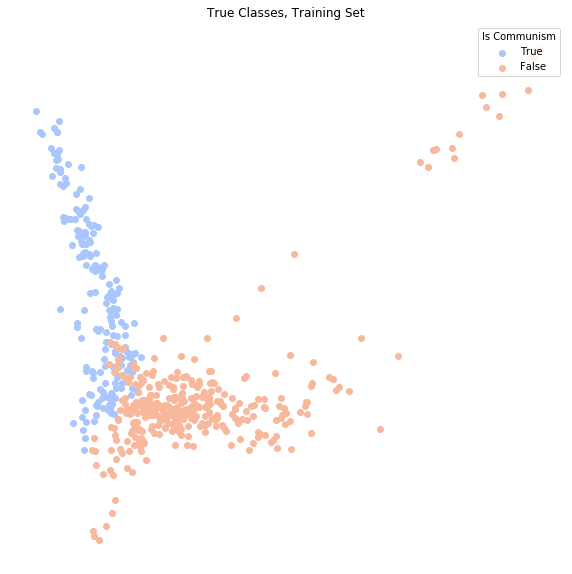

In [242]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Communism')
plt.title('True Classes, Training Set')
plt.show()

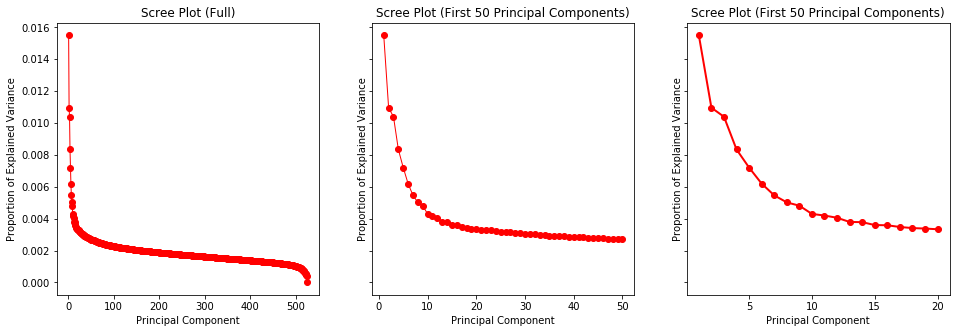

In [243]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

In [244]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

In [245]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [246]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.9714828897338403

In [247]:
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.6946564885496184

In [248]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.9771863117870723
Testing:
0.7022900763358778


In [249]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.9828897338403042
Testing:
0.7022900763358778


In [250]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.9904942965779467
Testing:
0.7022900763358778


In [251]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
1.0
Testing:
0.7022900763358778


In [252]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

1.0


In [253]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.7022900763358778


In [254]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [255]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
1.0
Testing:
0.9007633587786259


In [256]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

In [257]:
sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

1.0

In [258]:
sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'])

0.675

In [259]:
sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])

0.8059701492537313

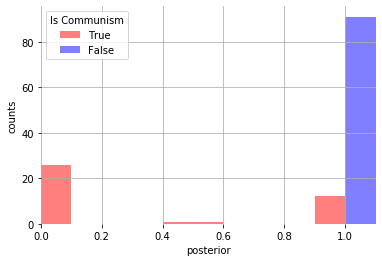

In [260]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Communism")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

In [261]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Communism' : [],
    'Communism_log_prob' : [],
    'Democratic' : [],
    'Democratic_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Communism'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Communism_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Democratic'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Democratic_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,Communism,Communism_log_prob,Democratic,Democratic_log_prob
0,инвестор,-1.251319,ния,-0.784119
1,бюджетный,-1.282091,ской,-0.808217
2,триллион,-1.282091,ся,-0.820487
3,компьютерный,-1.324650,гонка,-0.845488
4,телфакс,-1.335579,политбюро,-0.845488
5,пакет,-1.357802,ной,-0.858227
6,лицензия,-1.369102,ии,-0.910871
7,процентный,-1.380531,трудящийся,-0.924476
8,дума,-1.403788,ленин,-0.938270
9,оптовый,-1.403788,ма,-0.938270


Multinomial Bayes

In [188]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_data_df['lemmas_string'])
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [189]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [190]:
train_data_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_data_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

Training score:
1.0


In [191]:
train_data_df[['category', 'nb_predict']][:10]

,category,nb_predict
88,True,True
194,True,True
451,False,False
540,False,False
344,False,False
58,True,True
9,True,True
499,False,False
572,False,False
265,False,False


In [192]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_data_df['lemmas_string'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_data_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_data_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Testing score:
1.0


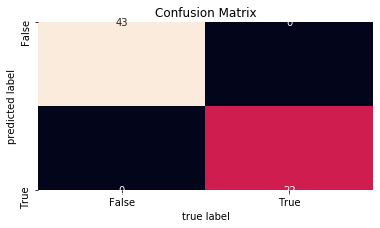

In [193]:
lucem_illud_2020.plotConfusionMatrix(MultinomialNB_ng, test_data_df)

In [194]:
print(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'], average = 'weighted')) #recall

1.0
1.0


In [195]:
lucem_illud_2020.metrics.evaluateClassifier(MultinomialNB_ng, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.0,1.0,1.0,1.0,1.0
True,0.0,1.0,1.0,1.0,1.0


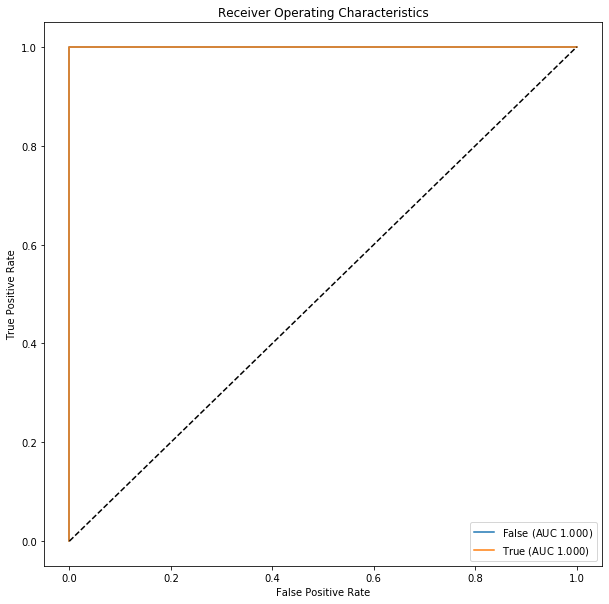

In [196]:
lucem_illud_2020.plotMultiROC(MultinomialNB_ng, test_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


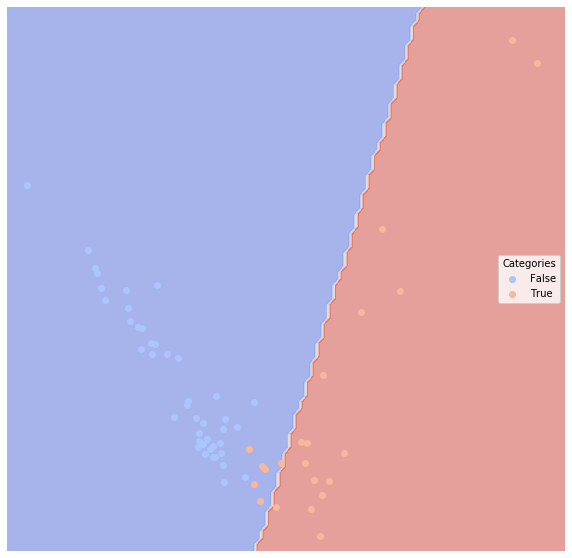

In [197]:
lucem_illud_2020.plotregions(MultinomialNB_ng, test_data_df)

The Naive Bayes seemed to perform best. Whereas other classifiers had trouble with the testing set, the Bayes model assigned the correct category 9 times out of ten.

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

In [198]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


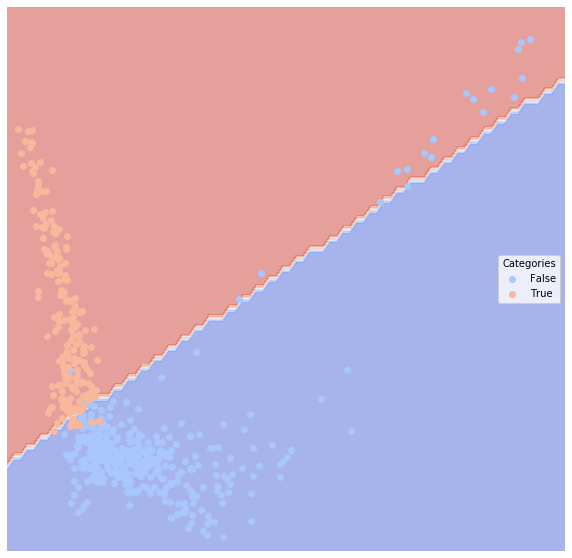

In [199]:
lucem_illud_2020.plotregions(clf_tree, train_data_df)

trees

In [200]:
lucem_illud_2020.evaluateClassifier(clf_tree, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.055743,0.921173,0.928401,0.926363,0.992347
True,0.055743,0.921173,0.982659,0.885936,0.850000


In [201]:
lucem_illud_2020.evaluateClassifier(clf_tree, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.107692,0.896406,0.95,0.916458,0.883721
True,0.107692,0.896406,0.80,0.758042,0.909091


In [202]:
sklearn.metrics.accuracy_score(test_data_df['category'],clf_tree.predict(np.stack(test_data_df['vect'], axis = 0)))

0.8923076923076924

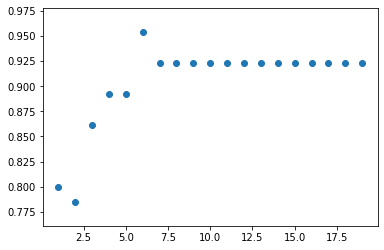

In [203]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])
    score = sklearn.metrics.accuracy_score(test_data_df['category'], tree2.predict(np.stack(test_data_df['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

In [204]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [205]:
bag.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


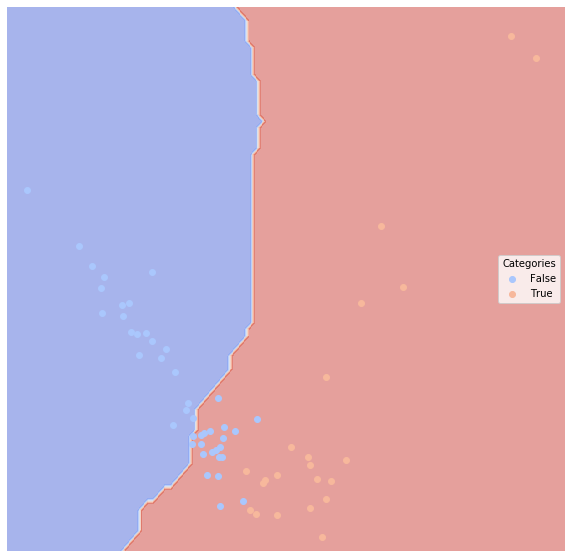

In [206]:
lucem_illud_2020.plotregions(bag, test_data_df)

In [207]:
lucem_illud_2020.evaluateClassifier(bag, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.015385,0.988372,1.000000,0.992129,0.976744
True,0.015385,0.988372,0.956522,0.956522,1.000000


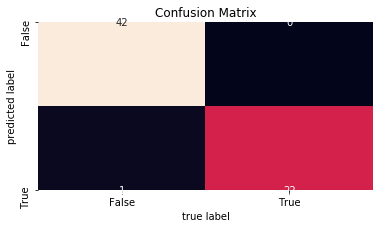

In [209]:
lucem_illud_2020.plotConfusionMatrix(bag, test_data_df)

In general these classifiers seem to perform really well on my data. Ensemble learning essentially collates multiple models into a single model, and then returns the final result based on all of the smaller models that it runs. It is a combination, an ensemble, of smaller preditctions aggregated into the final prediction. 

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [263]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [264]:
clf_knearest.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [265]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.009506,0.991439,0.997067,0.993078,0.988372
True,0.009506,0.991439,0.978378,0.974904,0.994505


In [266]:
test_data_df['nb_predict'] = clf_knearest.predict(np.stack(test_data_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Testing score:
0.8931297709923665


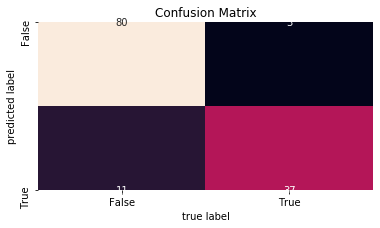

In [267]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


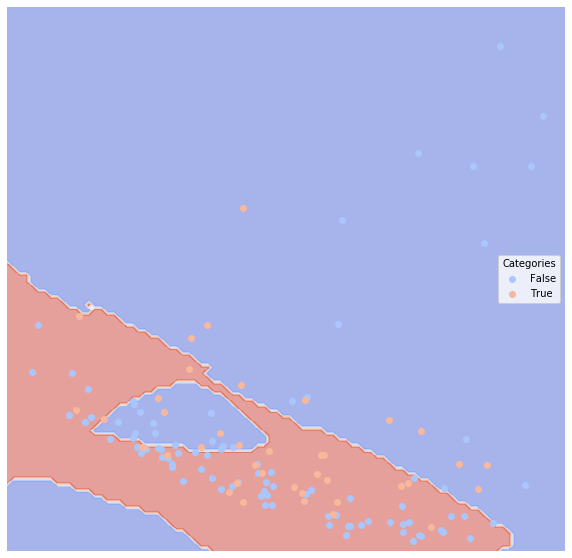

In [269]:
lucem_illud_2020.plotregions(clf_knearest, test_data_df)

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [216]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [217]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.0,1.0,1.0,1.0,1.0
True,0.0,1.0,1.0,1.0,1.0


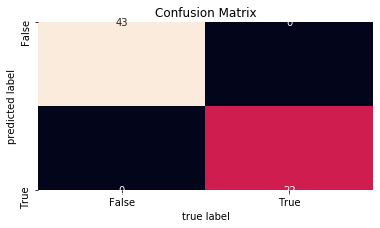

In [218]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


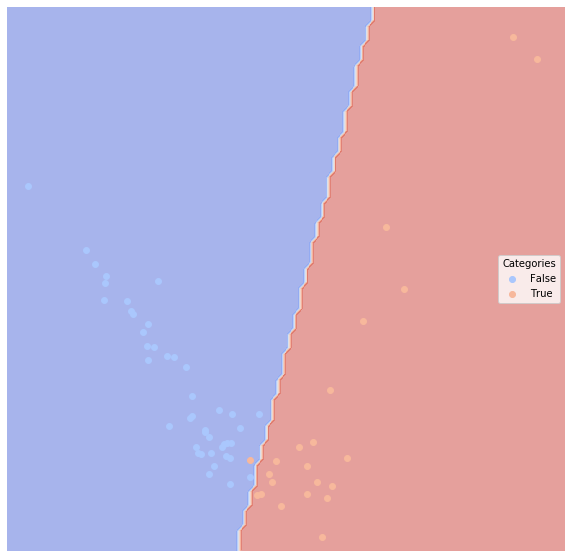

In [219]:
lucem_illud_2020.plotregions(clf_svm, test_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


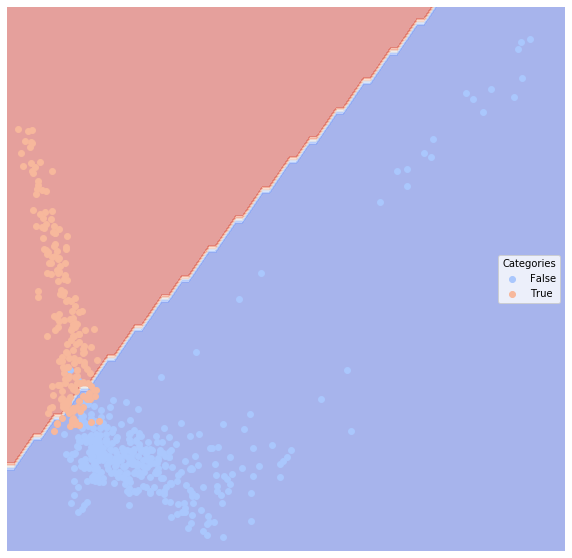

In [220]:
lucem_illud_2020.plotregions(clf_svm, train_data_df)

The main difference between a nueral network and other classifiers is that it has hidden layers, which give various weights to different data points, and combine them in different ways to see which gives the best result, and the final ouput, as far as I understand, is the best combination of these weights and combinations to most accurately predict the classes of the data that we desire.